# Image Denoising with Autoencoders

## Task 1: Introduction and Importing Libraries

In [1]:
import numpy as np

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline

## Task 2: Data Preprocessing

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.

x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

## Task 3: Adding Noise

In [3]:
x_train_noisy = x_train + np.random.rand(60000, 784) * 0.9
x_test_noisy = x_test + np.random.rand(10000, 784) * 0.9

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [4]:
def plot(x, p, labels = False):
    plt.figure(figsize=(20,2))
    for i in range(10):
        plt.subplot(1,10,i+1)
        plt.imshow(x[i].reshape(28,28), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()
    return

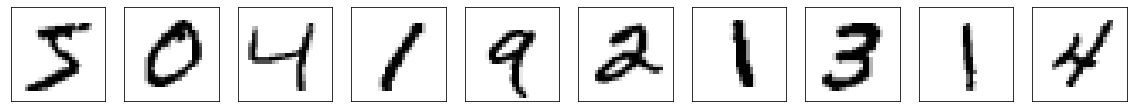

In [5]:
plot(x_train, None)

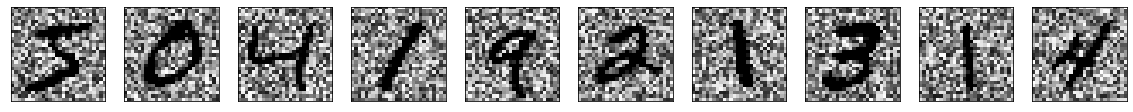

In [6]:
plot(x_train_noisy, None)

## Task 4: Building and Training a Classifier

In [7]:
classifier = Sequential([
    Dense(256, activation = 'relu', input_shape = (784,)),
    Dense(256, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

classifier.compile(
    loss = 'sparse_categorical_crossentropy', 
    optimizer = 'adam', 
    metrics = ['accuracy']
)
classifier.fit(x_train, y_train, epochs = 3, batch_size = 512)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4253 - accuracy: 0.8823
Epoch 2/3
60000/60000 [==============================] - 1s 16us/sample - loss: 0.1546 - accuracy: 0.9552
Epoch 3/3
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1063 - accuracy: 0.9683


In [8]:
loss, acc = classifier.evaluate(x_test, y_test)
print(acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.9695


In [9]:
loss, acc = classifier.evaluate(x_test_noisy, y_test)
print(acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.1659


## Task 5: Building the Autoencoder

In [10]:
input_image = Input(shape = (784,))
encoded = Dense(64, activation = 'relu')(input_image)
decoded = Dense(784, activation = 'sigmoid')(encoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'adam'
)

## Task 6: Training the Autoencoder

In [11]:
autoencoder.fit(
    x_train_noisy, x_train,
    epochs = 100, 
    batch_size = 512,
    validation_split = 0.2, 
    verbose = False,
    callbacks = [
        EarlyStopping(
            monitor = 'val_loss', 
            patience = 5
        ),
        LambdaCallback(
            on_epoch_end = lambda e, l: print('{:.3f}'.format(l['val_loss']), end = ' _ ')
        )
    ]
)

print(' _ ')
print('Training is complete!')

0.253 _ 0.223 _ 0.199 _ 0.183 _ 0.171 _ 0.160 _ 0.153 _ 0.146 _ 0.141 _ 0.137 _ 0.133 _ 0.130 _ 0.127 _ 0.125 _ 0.122 _ 0.120 _ 0.119 _ 0.117 _ 0.116 _ 0.115 _ 0.114 _ 0.113 _ 0.112 _ 0.112 _ 0.111 _ 0.111 _ 0.110 _ 0.110 _ 0.109 _ 0.109 _ 0.109 _ 0.109 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _  _ 
Training is complete!


## Task 7: Denoised Images

In [12]:
preds = autoencoder.predict(x_test_noisy)

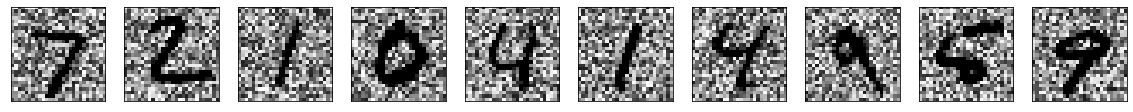

In [13]:
plot(x_test_noisy, None)

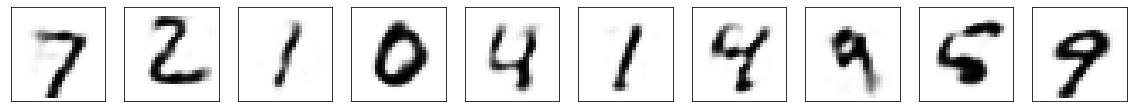

In [14]:
plot(preds, None)

In [15]:
loss, acc = classifier.evaluate(preds, y_test)
print(acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.9438


## Task 8: Composite Model

In [16]:
noisy_image = Input(shape=(784,))
x = autoencoder(noisy_image)
y = classifier(x)

denoise_and_classify = Model(noisy_image, y)

In [17]:
p = denoise_and_classify.predict(x_test_noisy)

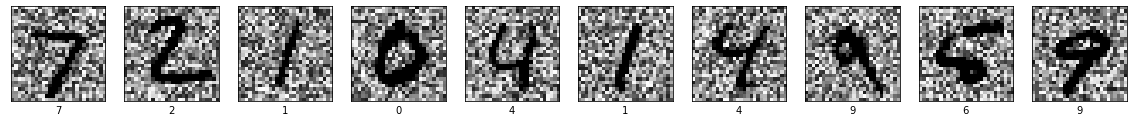

In [18]:
plot(x_test_noisy, p, True)

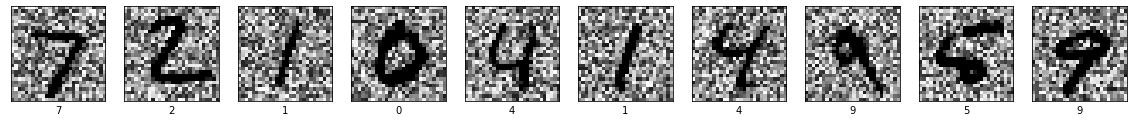

In [19]:
plot(x_test_noisy, to_categorical(y_test), True)

In [23]:
np.random.randn(100, 100, 100)

array([[[ 1.72815692e-01, -4.50055251e-01, -6.14680480e-02, ...,
          1.77708850e+00,  5.22802010e-01,  1.53842874e+00],
        [-1.14048608e+00,  6.33368868e-01,  2.57802003e-01, ...,
         -5.81372638e-01,  1.07883633e+00, -6.63837397e-01],
        [ 1.27554298e-01,  1.11588006e+00, -5.21721875e-01, ...,
         -9.80472659e-02, -7.71288350e-01, -1.65252385e-01],
        ...,
        [-2.46409912e-01, -6.77125213e-01, -9.08475590e-01, ...,
          1.75871881e-01, -4.16826136e-01, -1.02826944e+00],
        [ 4.59637660e-03, -6.82856305e-01, -7.75822542e-01, ...,
          2.87101247e+00,  1.03430416e+00,  1.03561023e-01],
        [-8.57954387e-01,  2.75196405e+00,  2.69748584e-01, ...,
         -1.22845244e+00,  8.43164979e-01, -9.85897847e-02]],

       [[ 5.53947914e-01, -2.72350112e-01,  1.22099114e-02, ...,
          1.70927484e+00,  1.87722188e-01, -1.14575650e-01],
        [ 5.53226686e-01,  1.04283675e+00, -1.32167134e-01, ...,
         -3.62188375e-01, -7.10519715e